In [1]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Peak into the data using pandas for creating DataFrame
df = pd.read_csv(r'C:\Users\SRISHTI\Downloads\cleaned_star_data.csv')
df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
24,16500,0.01300,0.014,11.89,2,Blue-White,B
5,2840,0.00065,0.110,16.98,0,Red,M
99,36108,198000.00000,10.200,-4.40,3,Blue,O
116,4015,282000.00000,1534.000,-11.39,5,Red,K
114,3610,132000.00000,1522.000,-10.86,5,Red,M
56,3660,363000.00000,1673.000,-11.92,5,Red,M
152,14060,1092.00000,5.745,-2.04,3,Blue-White,A
39,5587,0.81900,0.990,5.03,3,Yellow-White,F
220,23678,244290.00000,35.000,-6.27,4,Blue,O
101,40000,813000.00000,14.000,-6.23,4,Blue,O


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [4]:
# Create a directory to save the visualization
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok = True)
base_dir = r'C:\Users\SRISHTI\star_plots'

 ### Visualizations

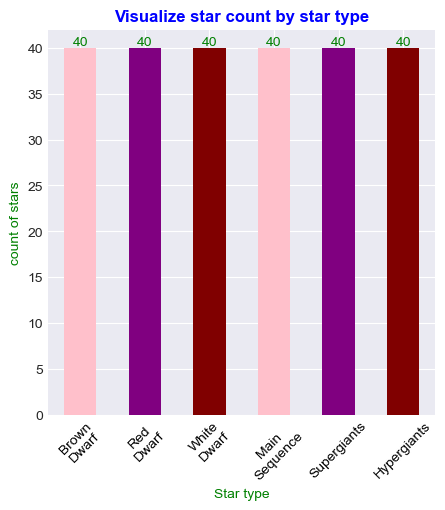

In [5]:
# Bar chart to visualize the count of stars with respective type
plt.figure(figsize=(5,5))
plt.style.use('seaborn-v0_8-darkgrid')
ax = df['Star type'].value_counts().plot(kind='bar', color=['pink', 'purple', 'maroon'])
ax.bar_label(ax.containers[0], color='green')
plt.title('Visualize star count by star type', color='blue', weight='bold')
plt.xlabel('Star type', color='green')
plt.ylabel('count of stars', color='green')
plt.xticks(
           ticks=[0,1,2,3,4,5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf','Main\nSequence', 'Supergiants', 'Hypergiants'], 
           color='black', 
           rotation=45
          )
plt.savefig(os.path.join(base_dir,'barplot_star_count.png'))
plt.show()

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


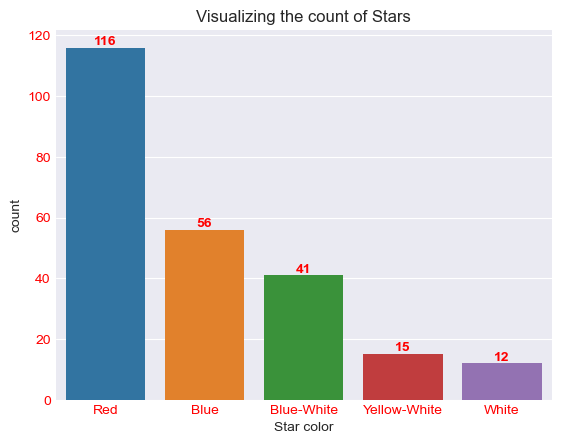

In [7]:
# Visualizing the star color data
ax = sns.barplot(x=df['Star color'].value_counts().index, y=df['Star color'].value_counts())
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.xticks( color='red')
plt.yticks(color='red')
plt.title('Visualizing the count of Stars')
plt.savefig(os.path.join(base_dir,'Visualizing the count of stars'))
plt.show()

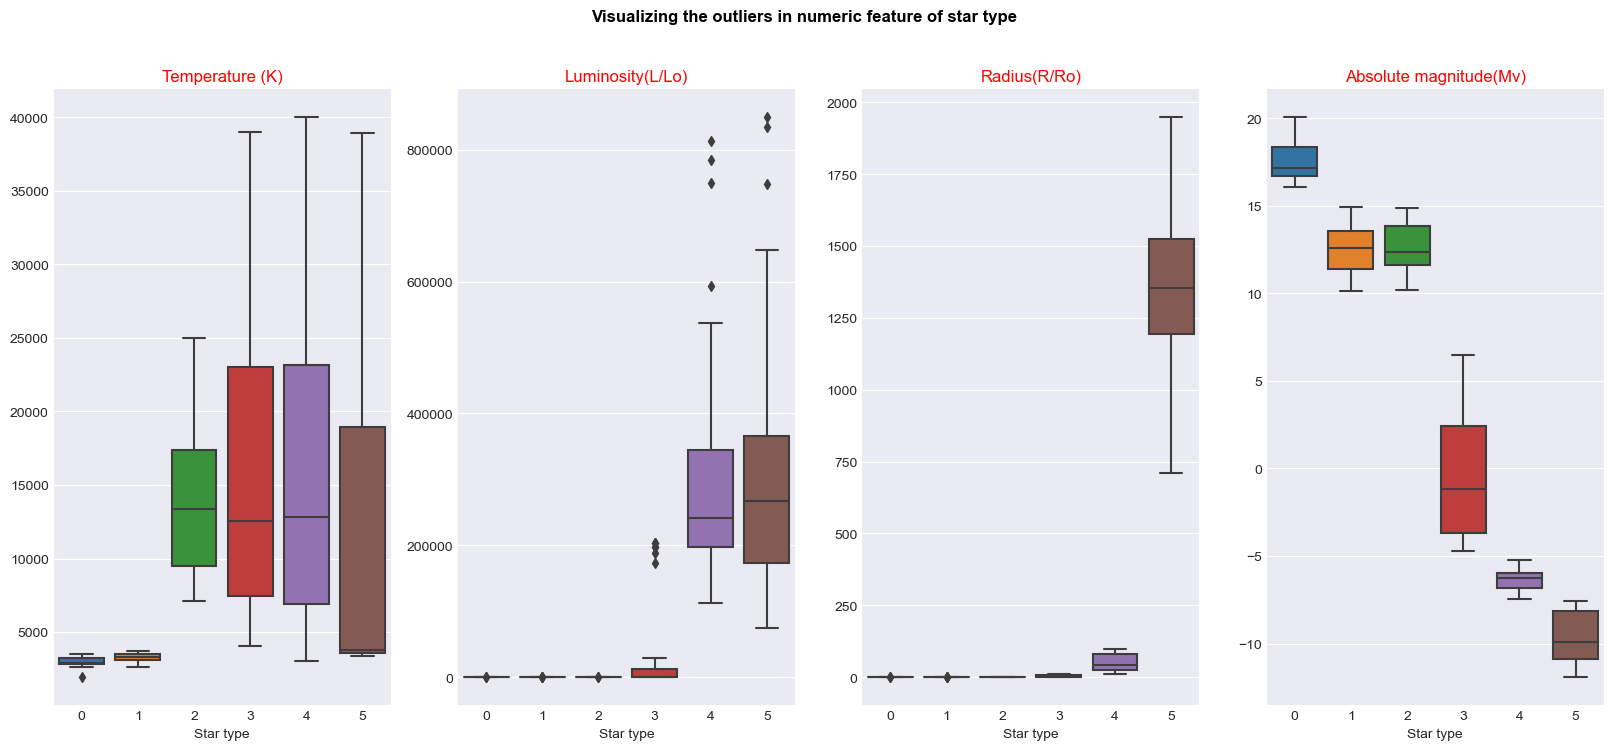

In [8]:
# Visualize outliers of the data
plt.figure(figsize=(20,8))
plt.suptitle('Visualizing the outliers in numeric feature of star type', color='black', weight='bold')
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=df['Star type'], y=df.iloc[:, i])
    plt.ylabel('')
    plt.title(df.columns[i],color='red')
plt.savefig(os.path.join(base_dir,'Boxplot_star_type'))
plt.show()

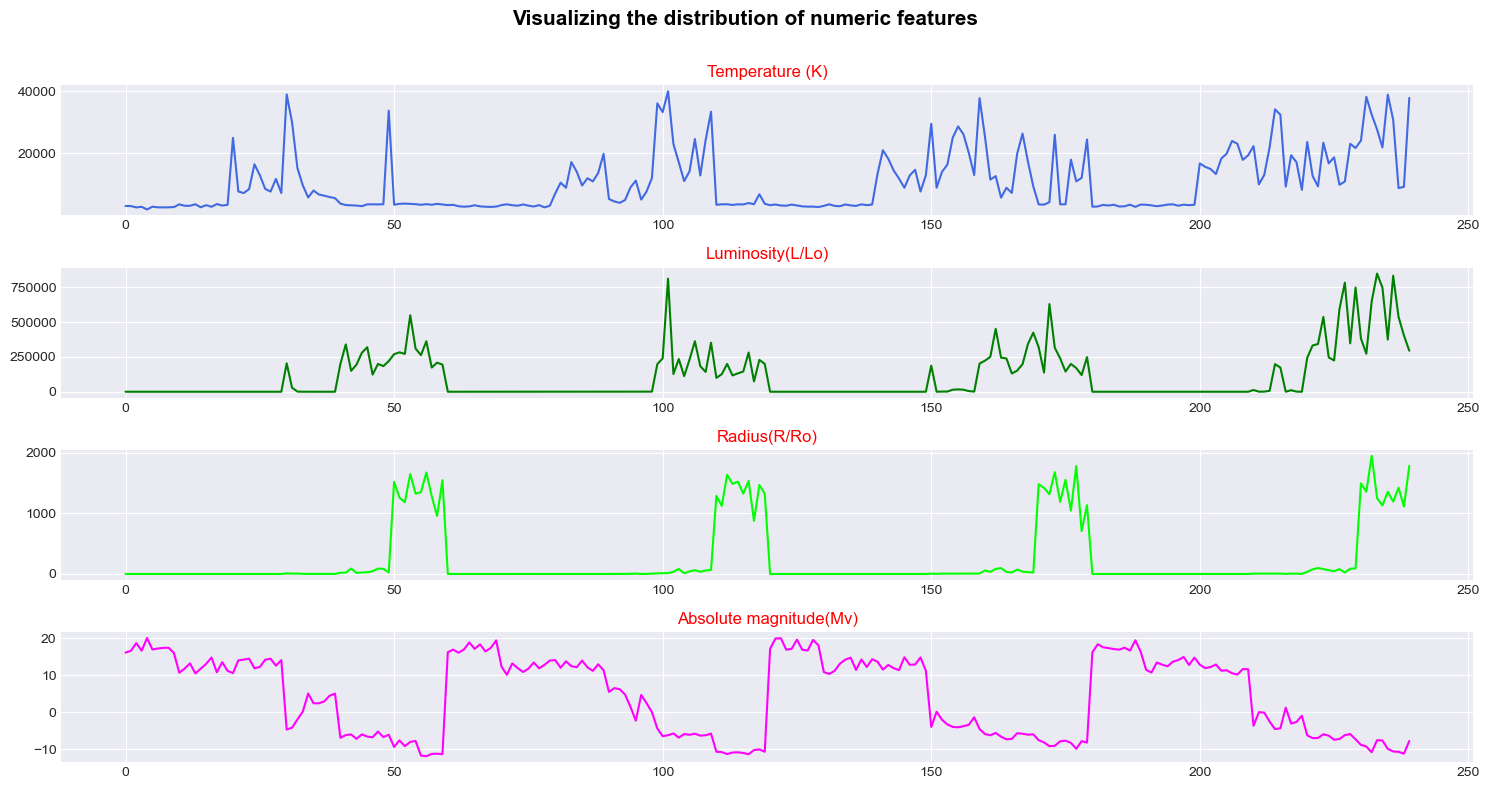

In [9]:
# Line plot
colors = ['royalblue', 'green', 'lime', 'magenta']
plt.figure(figsize=(15,8))
plt.suptitle('Visualizing the distribution of numeric features\n', color='black', weight='bold', fontsize=15)
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.plot(df.iloc[:,i], color=colors[i])
    plt.title(df.columns[i], color='red')
    plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Line_chart_for_numeric_features'))
plt.show()

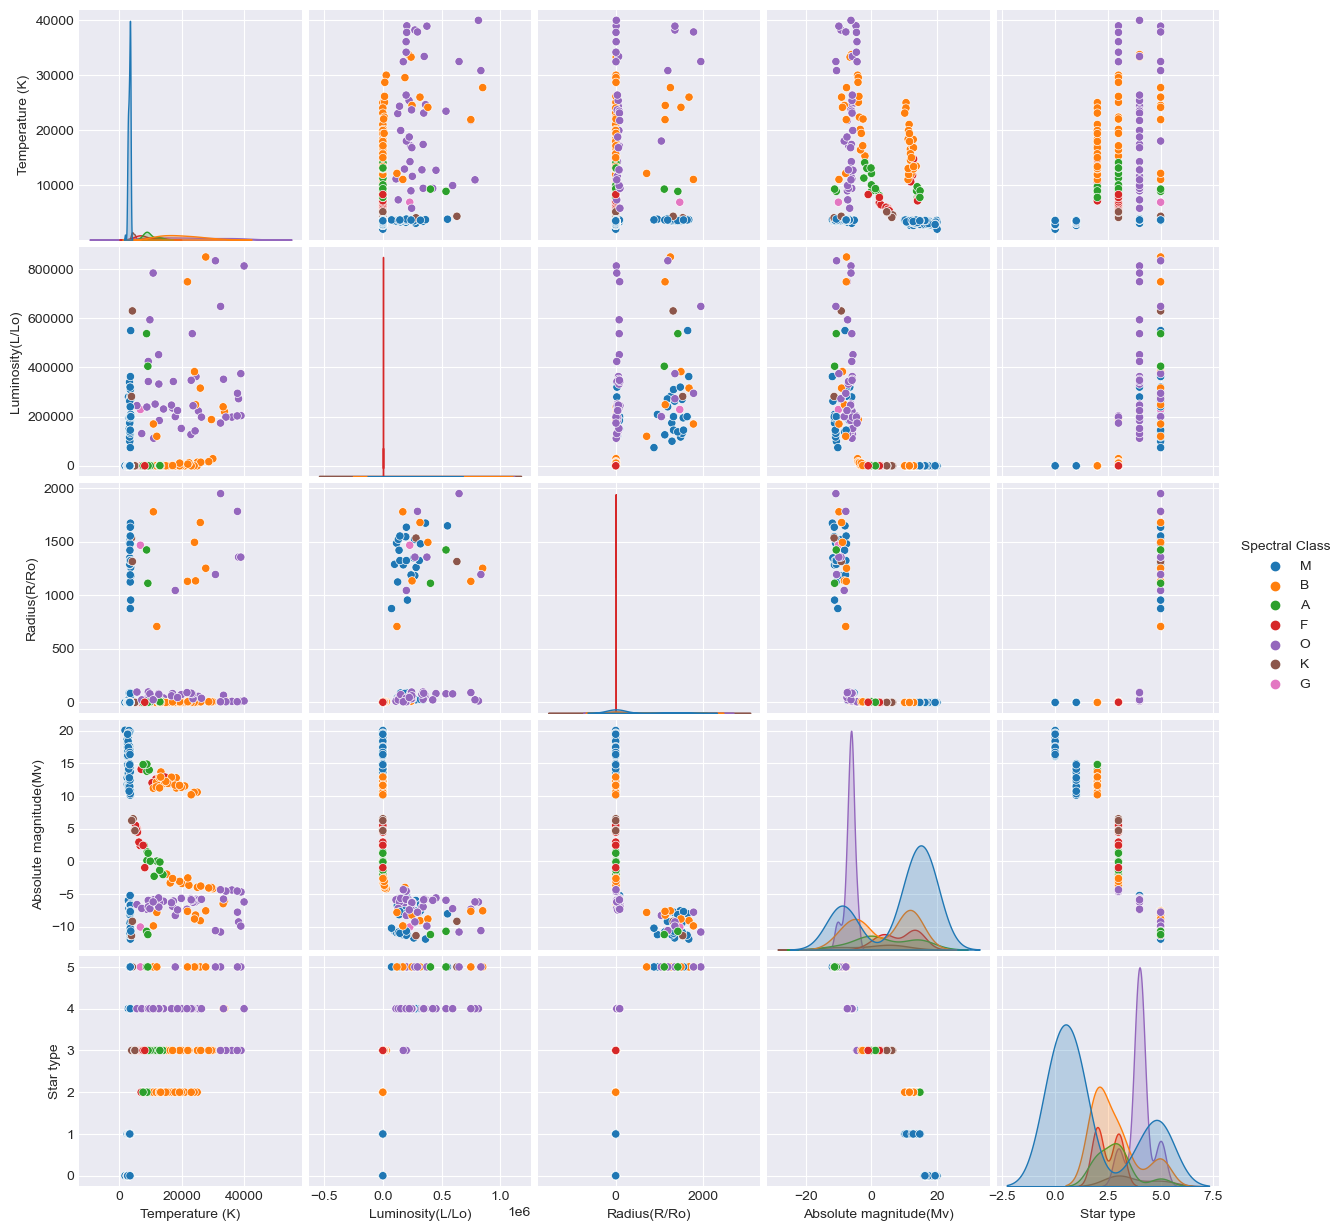

In [10]:
# Get pairplot - scatter
sns.pairplot(df, hue='Spectral Class')
plt.savefig(os.path.join(base_dir,'Pairplot_for_numeric_features'))
plt.show()

In [13]:
star_type = df['Star type'].values
temperature = df['Temperature (K)'].values
abs_mag = df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'Brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'Red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'White', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'},   
}

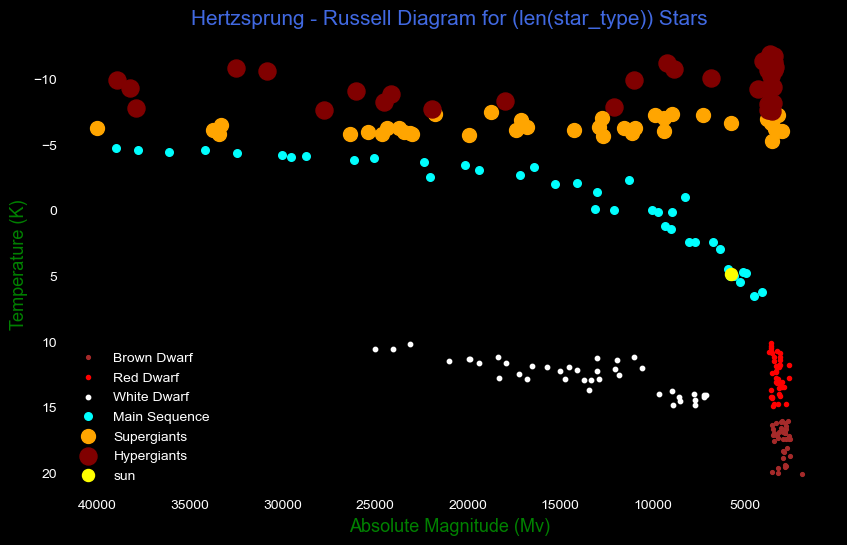

In [23]:
# Plotting the HR diagram for temp vs abs mag
axes = []
labels = set()

plt.figure(figsize=(10,6))
for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    
    if properties['label'] not in labels:
        ax =  plt.scatter(temperature[i],
                abs_mag[i],
                s=properties['size'],
                color=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

        axes.append(ax)
        labels.add(properties['label'])
    else:
        plt.scatter(
                    temperature[i], 
                    abs_mag[i],
                    s=properties['size'],
                    color=properties['color'],
                    marker=properties['marker'],
                    label=properties['label']
                    )
# Adding data for the sun
ax_sun = plt.scatter(5778, 4.83, s=75, c='yellow', marker='o', label='sun')
axes.append(ax_sun)
labels.add('Sun')

plt.style.use('dark_background')
plt.grid(False)
plt.title(f"Hertzsprung - Russell Diagram for (len(star_type)) Stars", fontsize=15, color='royalblue')
plt.xlabel('Absolute Magnitude (Mv)',fontsize=13, color='green')
plt.ylabel('Temperature (K)',fontsize =13, color='green')
plt.legend(handles=axes)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(os.path.join(base_dir,'HR Diagram'))

plt.show()